<div class="alert alert-block alert-warning">
    <h1> EDA ON TITANIC DATASET</h1>
</div>

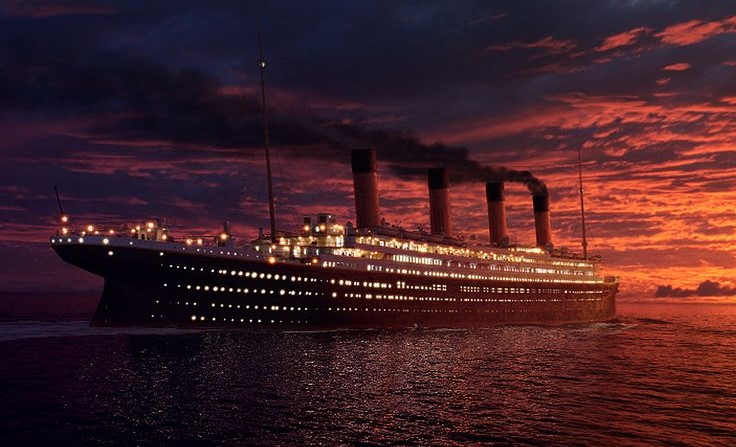

<div class="alert alert-block alert-warning">
    <h1> Project Overview</h1>
    
1) Understand the shape of the data (Histograms, box plots, etc.)
    
2) Data Cleaning
    
3) Data Exploration
    
4) Feature Engineering
    
5) Data Preprocessing for Model
    
6) Basic Model Building
    
7) Model Tuning
    
8) Ensemble Modle Building
    
9) Results
</div>

<div class="alert alert-block alert-warning">
    <h1> Project Planning </h1>
    
-  Understand nature of the data .info() .describe()
-  Histograms and boxplots 
-  Value counts 
-  Missing data 
-  Correlation between the metrics 
-  Explore interesting themes 
    
    -- Wealthy survive? 
    
    -- By location 
    
    -- Age scatterplot with ticket price 
    
    -- Young and wealthy Variable? 
    
    -- Total spent? 
    
-  Feature engineering 
-  preprocess data together or use a transformer? 
    
    -- use label for train and test   
    
-  Scaling?

-  Model 
</div>

<div class="alert alert-block alert-info">
    <h1> Imports : </h1>

    
</div>

In [94]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-block alert-info">
 <h1> Undrestanding the Data : </h1>    
</div>

In [95]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train.shape

(891, 12)

In [98]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
test.shape

(418, 11)

In [100]:
# make a data frame for all data train and test 
test['Survived'] = np.NaN
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [101]:
test.shape

(418, 12)

In [102]:
train['train_test'] = 1
test['train_test'] = 0

In [103]:
all_data = pd.concat([train,test])
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [104]:
all_data.shape

(1309, 13)

In [105]:
#quick look at our data types & null counts 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [106]:
# to better understand the numeric data, we want to use the .describe() method
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


<div class="alert alert-block alert-info">
 <h1> Data Exploration : </h1>    
        
1) For numeric data 
    
    - Made histograms to understand distributions
    - Corrplot
    - Pivot table comparing survival rate across numeric variables
     
2) For Categorical Data
    
    - Made bar charts to understand balance of classes
    - Made pivot tables to understand relationship with survival
    
</div>

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [108]:
#quick way to separate numeric columns
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [109]:
# we don't want cols --> PassengerId , Name , train_test
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

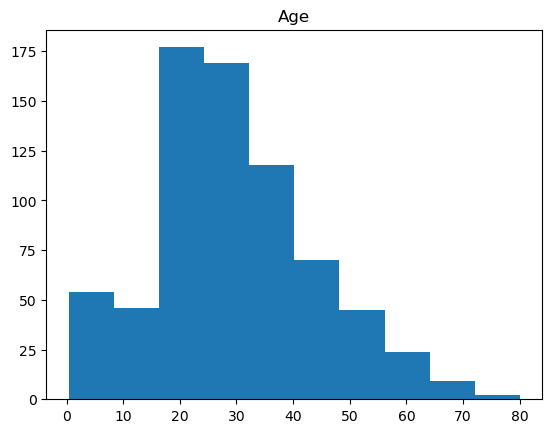

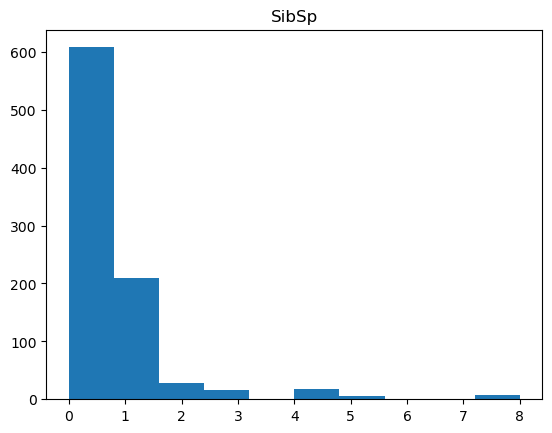

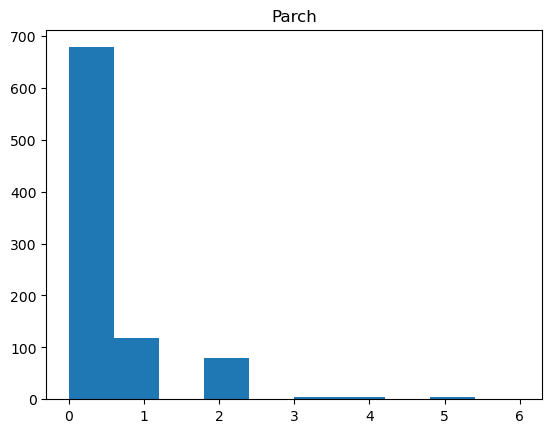

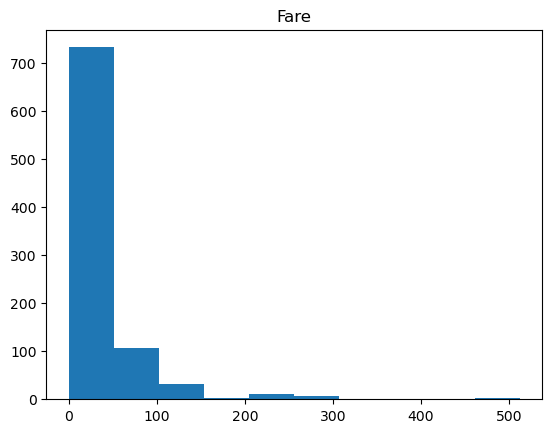

In [110]:
# distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\463923814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


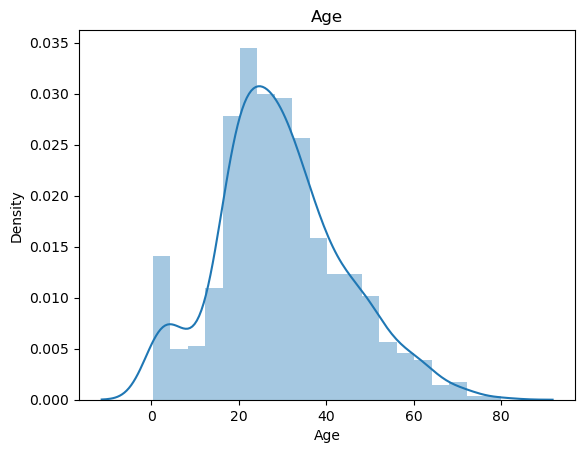

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\463923814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


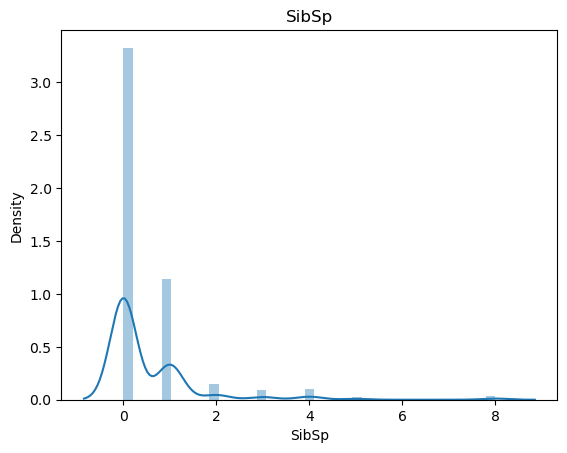

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\463923814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


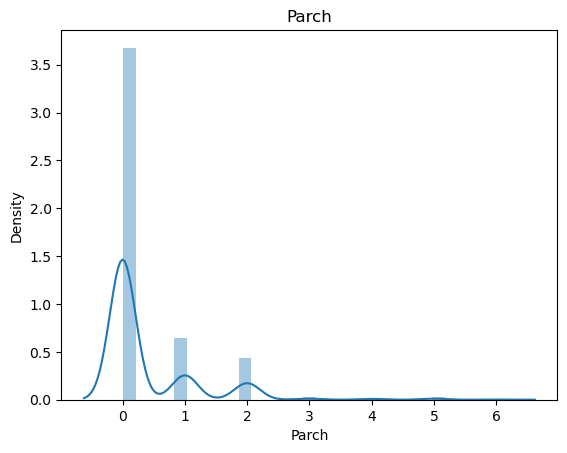

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\463923814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


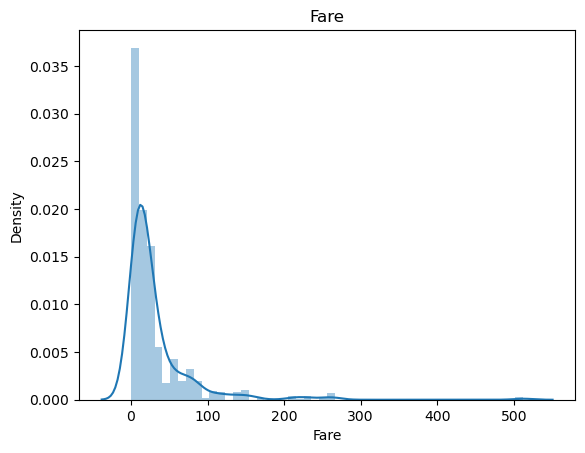

In [111]:
# distributions for all numeric variables 
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.title(i)
    plt.show()
    
# Perhaps we should take the non-normal distributions and consider normalizing them?    

In [112]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<Axes: >

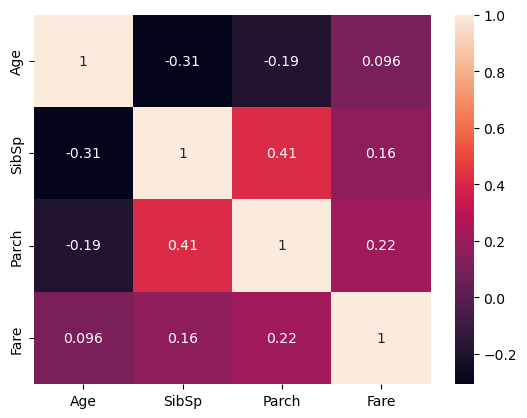

In [113]:
sns.heatmap(df_num.corr(),annot=True)

In [114]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


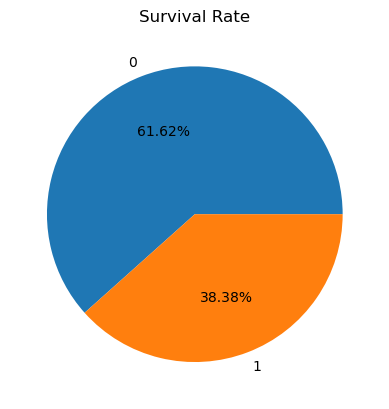

In [115]:
data = train['Survived'].value_counts()
print (data)
plt.pie(data,labels = data.index,autopct = '%1.2f%%')
plt.title('Survival Rate')
plt.show()

In [116]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


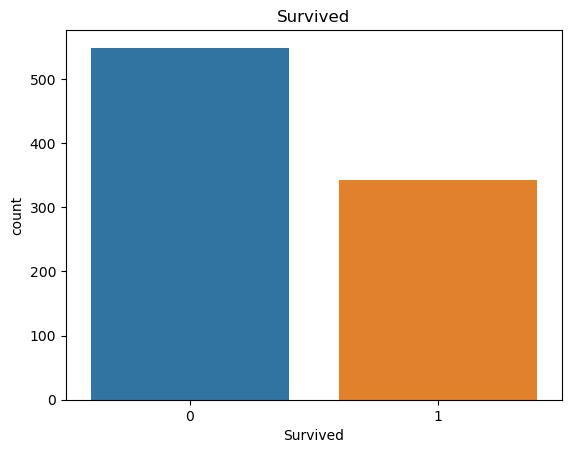

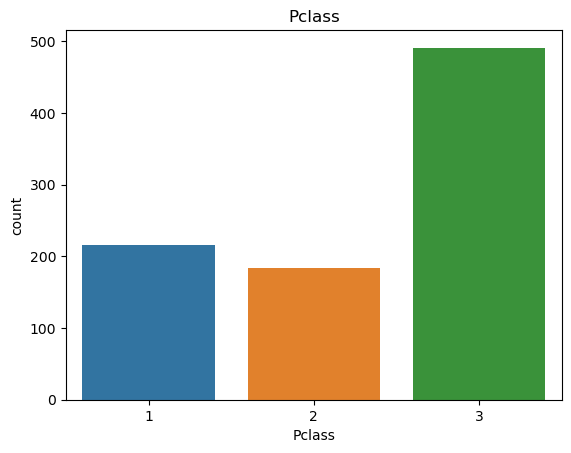

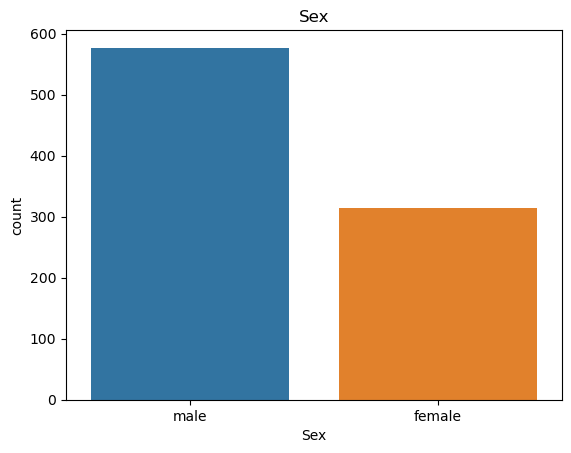

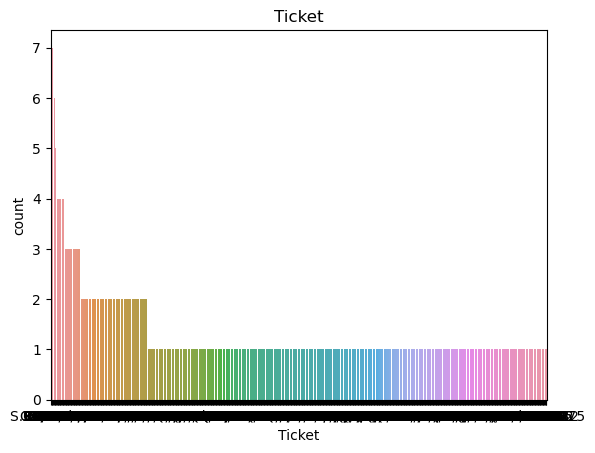

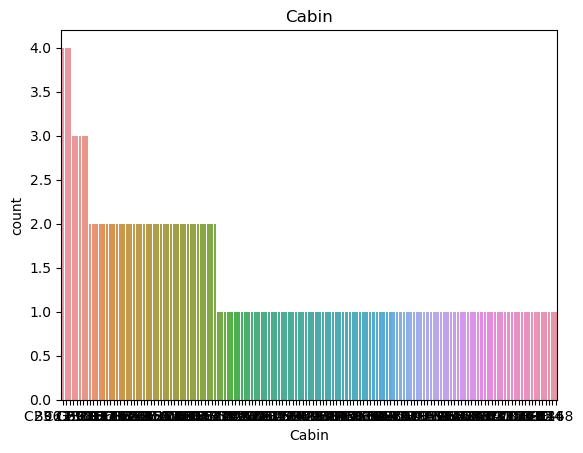

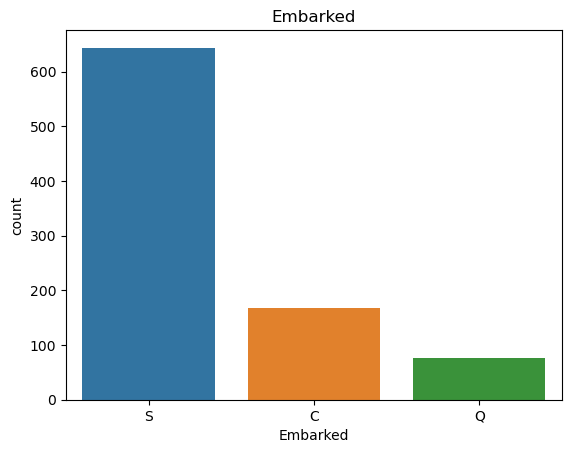

In [117]:
# catigorical cols

for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index,y = df_cat[i].value_counts()).set_title(i)
    plt.show()
    
# Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering!    

In [118]:
# Comparing survival and each of these categorical variables 
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values =  'Name' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [119]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values =  'Name' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [120]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values =  'Name',aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<div class="alert alert-block alert-info">
 <h1> Feature Engineering : </h1>    
        
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
     
2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates?
    
</div>

In [121]:
df_cat['Cabin'].nunique()

147

In [122]:
train['cabin_multiple'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [123]:
train['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [124]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values =  'Name' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [125]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

train['cabin_cat'] = train['Cabin'].apply(lambda x: str(x)[0])

In [126]:
train['cabin_cat'].value_counts()

cabin_cat
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [127]:
#comparing surivial rate by cabin
pd.pivot_table(train,index='Survived',columns='cabin_cat', values = 'Name', aggfunc='count')

cabin_cat,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [128]:
#understand ticket values better 
x= '9'
x.isnumeric()

True

In [129]:
#numeric vs non numeric

train['numeric_ticket'] = train['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

In [130]:
train['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [131]:
# look at the ticket types
y = '370375'
z=y.split(' ')[:-1]
print(z)


train['ticket_letters'] = train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

[]


In [132]:
train['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [133]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train,index='Survived',columns='numeric_ticket', values = 'Name', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [134]:
#survival rate across different tyicket types 
pd.pivot_table(train,index='Survived',columns='ticket_letters', values = 'Name', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [135]:
#feature engineering on person's title 
train['Name'].head(50)


0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [136]:
train['name_title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc

In [137]:
train['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [138]:
#survival rate across different name_title types 
pd.pivot_table(train,index='Survived',columns='name_title', values = 'Name', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [139]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_cat'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [140]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_cat,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


<div class="alert alert-block alert-info">
 <h1> Data Preprocessing for Model : </h1>    
        
1) Deal with null and duplicated values
     
2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
    
     - Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Normalized fare using logarithm to give more semblance of a normal distribution
    
4) Scaled data 0-1 with standard scaler
    
</div>

In [141]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_test      1309 non-null   int64  
 13  cabin_multiple  1309 non-null   int64  
 14  cabin_cat       1309 non-null   object 
 15  numeric_ticket  1309 non-null   int64  
 16  ticket_letters  1309 non-null   object 
 17  name_title      1309 non-null   object 

In [142]:
#impute nulls for continuous data 

#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(all_data.Age.median())
# or all_data.Age.fillna(all_data.Age.median() , inplace =True)

#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(all_data.Fare.median())


In [143]:
#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#or you can fill it with the mode
#all_data.Embarked.fillna(all_data.Embarked.mode().iloc[0], inplace=True)

In [144]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_test      1307 non-null   int64  
 13  cabin_multiple  1307 non-null   int64  
 14  cabin_cat       1307 non-null   object 
 15  numeric_ticket  1307 non-null   int64  
 16  ticket_letters  1307 non-null   object 
 17  name_title      1307 non-null   object 

In [145]:
# check duplicats
duplicateRows = all_data[all_data.duplicated()]
duplicateRows

# there is no duplicated rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_cat,numeric_ticket,ticket_letters,name_title


In [146]:
# Normalized  fare using logarithm to give more semblance of a normal distribution
# We have more than one type of normalization and we can use sklearn lib

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\332046141.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_norm['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

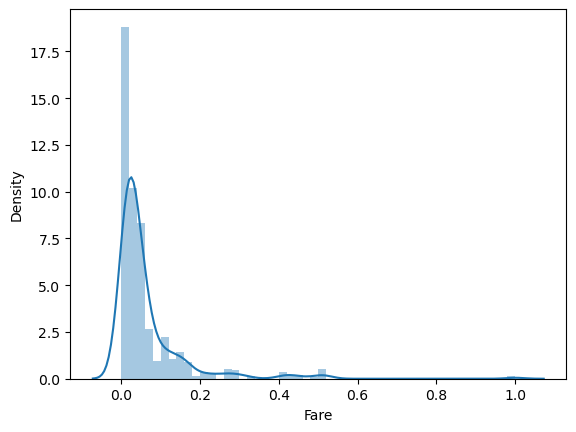

In [147]:
# copy the data 
ad_norm = all_data.copy() 
# 1) Pandas Normalize Using The maximum absolute scaling
ad_norm['Fare'] = ad_norm['Fare'] /ad_norm['Fare'].abs().max() 
sns.distplot(ad_norm['Fare'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\4169451857.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_norm['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

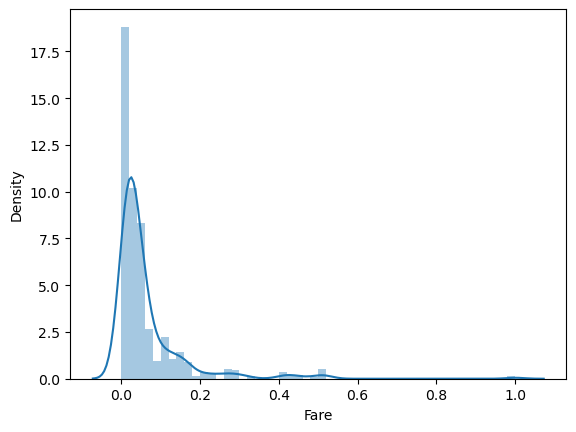

In [148]:
# copy the data 
ad_norm = all_data.copy() 
# 2) Pandas Normalize Using The min-max feature scaling

ad_norm['Fare'] = (ad_norm['Fare'] - ad_norm['Fare'].min()) /(ad_norm['Fare'].max() - ad_norm['Fare'].min())
sns.distplot(ad_norm['Fare'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\1615075027.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_norm['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

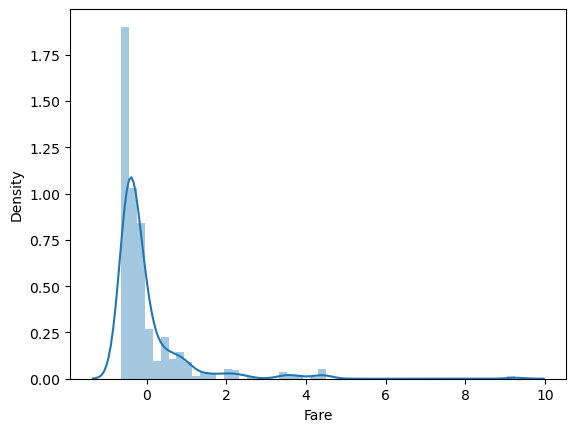

In [149]:
# copy the data 
ad_norm = all_data.copy() 

# 3) Pandas Normalize Using The z-score method:

# The z-score method (often called standardization)
# Each standardized value is computed by subtracting the mean of the corresponding feature 
# then dividing by the quality deviation.

ad_norm['Fare'] = (ad_norm['Fare'] - ad_norm['Fare'].mean()) /ad_norm['Fare'].std()
sns.distplot(ad_norm['Fare'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_28272\4106628434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_norm['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

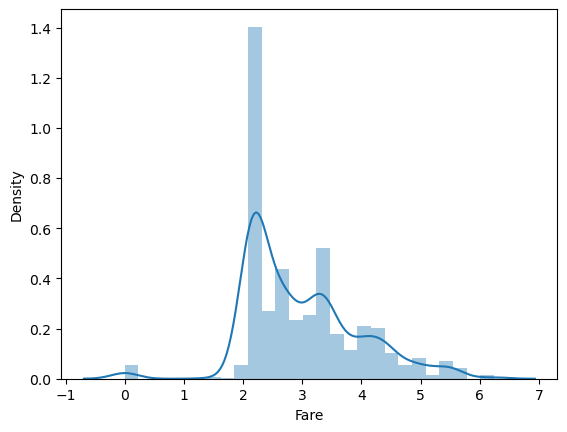

In [150]:
# copy the data 
ad_norm = all_data.copy() 
# 4) numpy using logarithm
ad_norm['Fare'] = np.log(ad_norm.Fare+1)
sns.distplot(ad_norm['Fare'])

<Axes: >

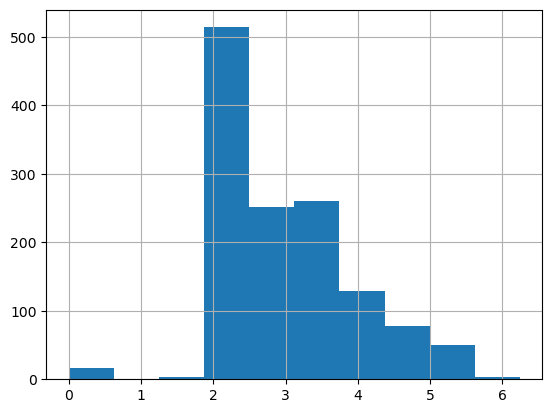

In [151]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()
#sns.distplot(all_data['norm_fare'])

In [152]:
# pandas.get_dummies
s = pd.Series(list('abca'))

In [153]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [154]:
s1 = ['a', 'b', np.nan]

In [155]:
pd.get_dummies(s1)

,a,b
0,True,False
1,False,True
2,False,False


In [156]:
pd.get_dummies(s1, dummy_na=True)

,a,b,NaN
0,True,False,False
1,False,True,False
2,False,False,True


In [157]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [158]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [159]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [160]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,True,False,False


In [161]:
pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)


,b,c
0,False,False
1,True,False
2,False,True
3,False,False
4,False,False


In [162]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_test      1307 non-null   int64  
 13  cabin_multiple  1307 non-null   int64  
 14  cabin_cat       1307 non-null   object 
 15  numeric_ticket  1307 non-null   int64  
 16  ticket_letters  1307 non-null   object 
 17  name_title      1307 non-null   object 

In [163]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_cat,numeric_ticket,ticket_letters,name_title,norm_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr,2.202765


In [164]:
# converted Pclass to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

In [165]:
all_dum = pd.get_dummies(all_data)
all_dum

,PassengerId,Survived,Age,SibSp,Parch,Fare,train_test,cabin_multiple,numeric_ticket,norm_fare,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,0.0,22.0,1,0,7.2500,1,0,0,2.110213,...,False,False,False,False,True,False,False,False,False,False
1,2,1.0,38.0,1,0,71.2833,1,1,0,4.280593,...,False,False,False,False,False,True,False,False,False,False
2,3,1.0,26.0,0,0,7.9250,1,0,0,2.188856,...,False,True,False,False,False,False,False,False,False,False
3,4,1.0,35.0,1,0,53.1000,1,1,1,3.990834,...,False,False,False,False,False,True,False,False,False,False
4,5,0.0,35.0,0,0,8.0500,1,0,1,2.202765,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,28.0,0,0,8.0500,0,0,0,2.202765,...,False,False,False,False,True,False,False,False,False,False
414,1306,NaN,39.0,0,0,108.9000,0,1,0,4.699571,...,False,False,False,False,False,False,False,False,False,False
415,1307,NaN,38.5,0,0,7.2500,0,0,0,2.110213,...,False,False,False,False,True,False,False,False,False,False
416,1308,NaN,28.0,0,0,8.0500,0,0,1,2.202765,...,False,False,False,False,True,False,False,False,False,False


In [166]:
all_data2 =all_data[all_data.train_test==1]

In [167]:
all_data2.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
train_test          0
cabin_multiple      0
cabin_cat           0
numeric_ticket      0
ticket_letters      0
name_title          0
norm_fare           0
dtype: int64

In [168]:
# now we can drob cols ---> PaassengerID , Name , Ticket , Cabin and thin creat dummies for the remainind cols
# or we can creat dummies for the wanted cols only 
#created dummy variables from categories (also can use OneHotEncoder from sklearn)
all_dummies = pd.get_dummies(all_data2[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_cat','cabin_multiple','numeric_ticket','name_title','train_test']])
all_dummies

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,4.280593,1,0,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,2.188856,0,0,1,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,3.990834,1,1,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,2.202765,0,1,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,0,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
887,19.0,0,0,3.433987,1,1,1,True,False,False,...,False,True,False,False,False,False,False,False,False,False
888,28.0,1,2,3.196630,0,0,1,False,False,True,...,False,True,False,False,False,False,False,False,False,False
889,26.0,0,0,3.433987,1,1,1,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [169]:
all_dummies2 = pd.get_dummies(all_data2[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_cat','cabin_multiple','numeric_ticket','name_title','train_test','Survived']], drop_first=True).astype(int)
all_dummies2

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Survived,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22,1,0,2,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38,1,0,4,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26,0,0,2,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,35,1,0,3,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35,0,0,2,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27,0,0,2,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,19,0,0,3,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
888,28,1,2,3,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
889,26,0,0,3,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [170]:
all_dummies2.columns

Index(['Age', 'SibSp', 'Parch', 'norm_fare', 'cabin_multiple',
       'numeric_ticket', 'train_test', 'Survived', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'cabin_cat_B', 'cabin_cat_C',
       'cabin_cat_D', 'cabin_cat_E', 'cabin_cat_F', 'cabin_cat_G',
       'cabin_cat_T', 'cabin_cat_n', 'name_title_Col', 'name_title_Don',
       'name_title_Dr', 'name_title_Jonkheer', 'name_title_Lady',
       'name_title_Major', 'name_title_Master', 'name_title_Miss',
       'name_title_Mlle', 'name_title_Mme', 'name_title_Mr', 'name_title_Mrs',
       'name_title_Ms', 'name_title_Rev', 'name_title_Sir',
       'name_title_the Countess'],
      dtype='object')

In [171]:
all_dummies2.shape

(889, 37)

<div class="alert alert-block alert-info">
 <h1>Model Building  : </h1>    

    
</div>

In [172]:
x = all_dummies2.drop(columns=['Survived'])
y = all_dummies2['Survived']

In [173]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [175]:
# Training and Predicting
from sklearn.linear_model import LogisticRegression

In [176]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
predictions = logmodel.predict(X_test)

In [178]:
np.mean(y_test==predictions)

0.8539325842696629

In [179]:
# Evaluation
from sklearn import metrics

In [180]:
metrics.confusion_matrix(y_test,predictions)

array([[152,  11],
       [ 28,  76]], dtype=int64)

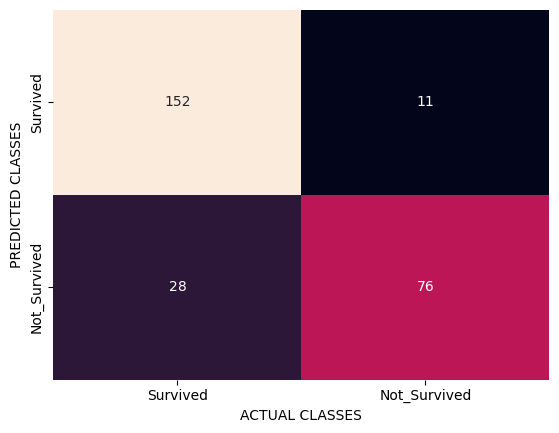

In [189]:
cm = metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm , annot=True ,cbar=False ,fmt='.3g')
plt.yticks(np.arange(2)+0.5,['Survived','Not_Survived'])
plt.xticks(np.arange(2)+0.5,['Survived','Not_Survived'])
plt.xlabel("ACTUAL CLASSES")
plt.ylabel("PREDICTED CLASSES")

plt.show()

In [190]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       163
           1       0.87      0.73      0.80       104

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267



In [191]:
logr_auc = metrics.roc_auc_score(y_test,predictions)
print(logr_auc)

0.8316422840962718


In [185]:
metrics.roc_curve(y_test,predictions)

(array([0.        , 0.06748466, 1.        ]),
 array([0.        , 0.73076923, 1.        ]),
 array([inf,  1.,  0.]))

In [193]:
logr_fpr, logr_tpr,__= metrics.roc_curve(y_test,predictions)

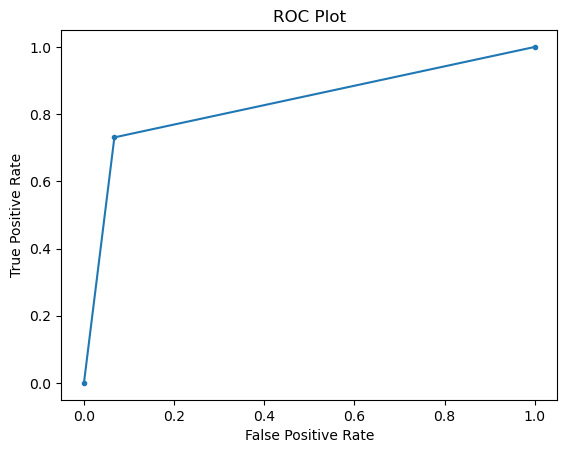

In [187]:
plt.plot(logr_fpr, logr_tpr, marker='.')


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
     
